In [2]:
import numpy as np
import cv2
import os
from skimage.feature import greycomatrix,greycoprops
import pandas as pd
INPUT_SCAN_FOLDER='C:\\Users\\thaqu\\Desktop\\MTech Project Machine Learning\\NEU-DET\\NEU surface defect database\\' # path where the dataset is stored

slices=[]
for dirName, subdirList, fileList in os.walk(INPUT_SCAN_FOLDER):
        for filename in fileList:
            if ".bmp" in filename.lower():
                slices.append(cv2.imread(os.path.join(dirName, filename),0))

print("done")

done


In [3]:
proList = ['contrast', 'dissimilarity', 'homogeneity', 'ASM', 'energy']
featlist= ['contrast', 'dissimilarity', 'homogeneity', 'ASM', 'energy','Label']
properties =np.zeros(5)
glcmMatrix = []
final=[]

In [4]:
final

[]

In [5]:
glcmMatrix

[]

In [6]:
featlist

['contrast', 'dissimilarity', 'homogeneity', 'ASM', 'energy', 'Label']

In [7]:
proList

['contrast', 'dissimilarity', 'homogeneity', 'ASM', 'energy']

In [8]:
len(slices)

1800

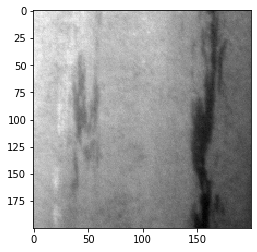

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(slices[485],cmap='gray')

In [10]:
import cv2
#  get dimensions of image
dimensions = slices[485].shape
 # height, width, number of channels in image
height = slices[485].shape[0]
width = slices[485].shape[1]
#channels = slices[485].shape[2]
 
print('Image Dimension    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)
#print('Number of Channels : ',channels)

Image Dimension    :  (200, 200)
Image Height       :  200
Image Width        :  200


In [11]:
for i in range(len(slices)):
    img = slices[i]
    glcmMatrix=(greycomatrix(img, [1], [0], levels=256))

    for j in range(0, len(proList)):
        properties[j]=(greycoprops(glcmMatrix, prop=proList[j]))

    label=(i/300)
    features = np.array([properties[0],properties[1],properties[2],properties[3],properties[4],np.floor(label)])
    final.append(features)

df = pd.DataFrame(final,columns=featlist)

In [12]:
df.head()

,contrast,dissimilarity,homogeneity,ASM,energy,Label
0,320.838116,14.130477,0.069042,0.000197,0.014052,0.0
1,240.708618,12.119623,0.083115,0.000182,0.013508,0.0
2,274.596633,12.992412,0.077501,0.000213,0.014600,0.0
3,313.191231,13.981332,0.069765,0.000235,0.015342,0.0
4,152.986181,9.431005,0.107868,0.000235,0.015315,0.0


In [13]:
df.describe()

,contrast,dissimilarity,homogeneity,ASM,energy,Label
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.0000
mean,115.180411,6.814885,0.220165,0.004165,0.044142,2.5000
std,121.106244,4.362020,0.118689,0.015573,0.047088,1.7083
min,2.513065,1.185477,0.061730,0.000136,0.011657,0.0000
25%,18.001866,2.906734,0.114512,0.000394,0.019856,1.0000
50%,58.298518,5.589937,0.187308,0.000978,0.031277,2.5000
75%,198.853229,10.523015,0.324831,0.002695,0.051911,4.0000
max,432.505050,16.436005,0.536568,0.219543,0.468555,5.0000


In [14]:
import seaborn as sns

C:\Users\thaqu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\thaqu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


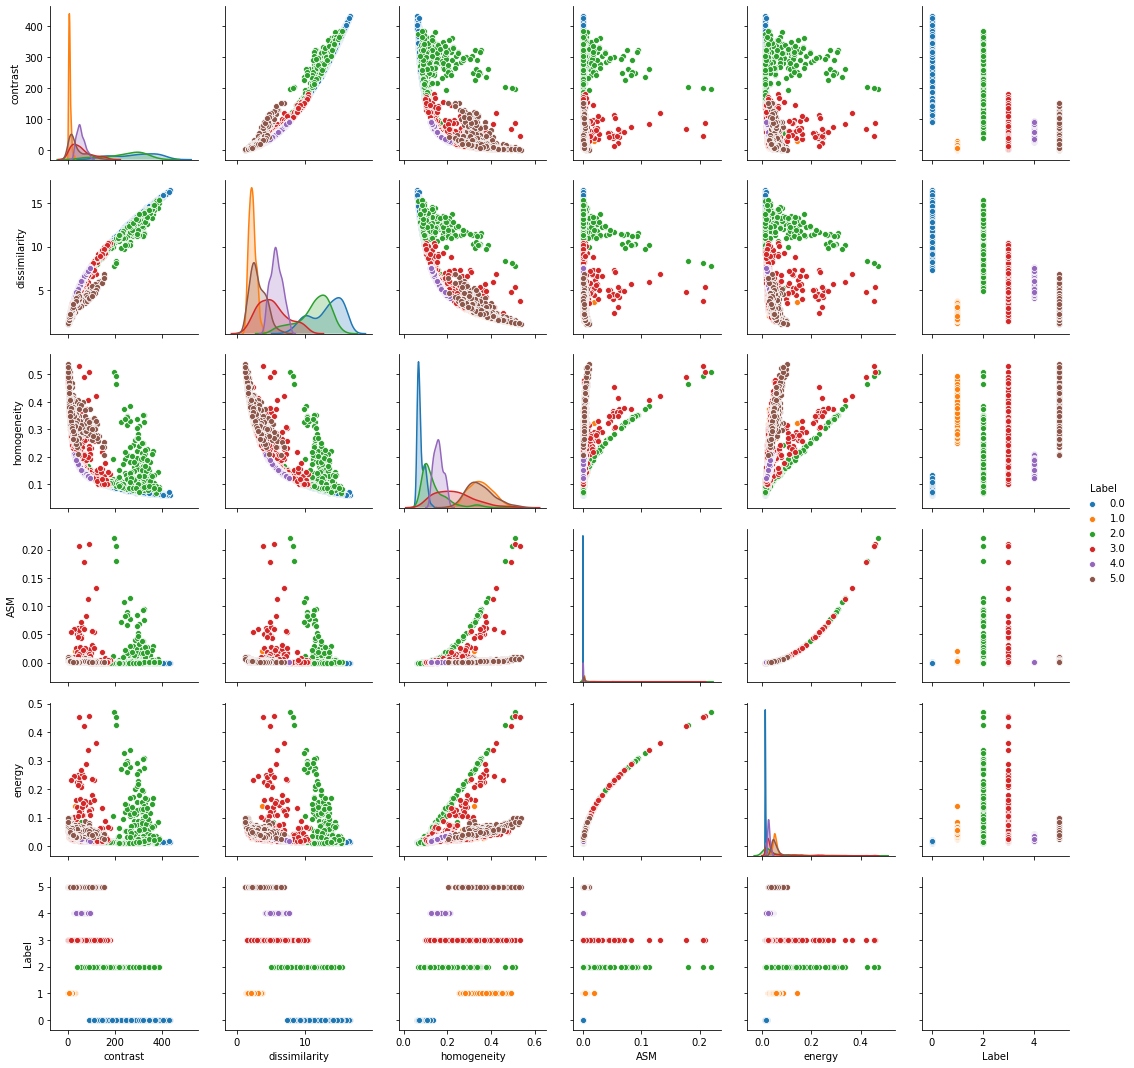

In [15]:
sns.pairplot(df,hue = 'Label')

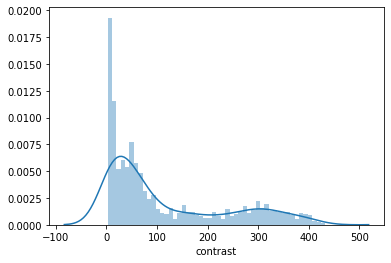

In [16]:
sns.distplot(df['contrast'],bins=50)

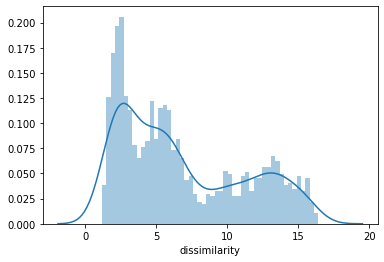

In [17]:
sns.distplot(df['dissimilarity'],bins=50)


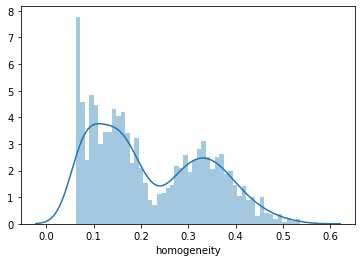

In [18]:
sns.distplot(df['homogeneity'],bins=50)


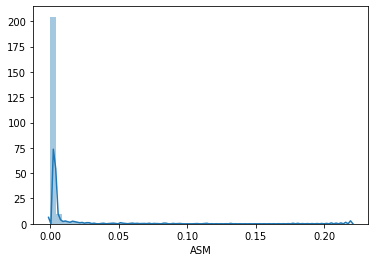

In [19]:
sns.distplot(df['ASM'],bins=50)


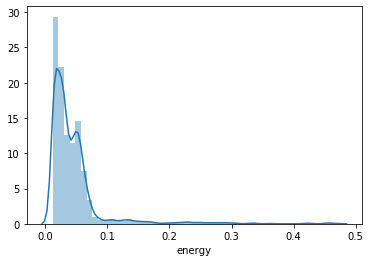

In [20]:
sns.distplot(df['energy'],bins=50)

In [21]:
#slices[55].shape
#slices[55]

In [22]:
#len(slices)
#slices[0].reshape(200*200)

In [23]:

for i in range(1800):
    slices[i]=(slices[i].reshape(200*200))
    

In [24]:
slices[6].size

40000

In [25]:
df['Flatten_Pixel']=slices

In [26]:
df.head()

,contrast,dissimilarity,homogeneity,ASM,energy,Label,Flatten_Pixel
0,320.838116,14.130477,0.069042,0.000197,0.014052,0.0,"[186, 175, 173, 196, 190, 188, 172, 174, 192, ..."
1,240.708618,12.119623,0.083115,0.000182,0.013508,0.0,"[163, 160, 148, 142, 174, 191, 207, 215, 176, ..."
2,274.596633,12.992412,0.077501,0.000213,0.014600,0.0,"[127, 106, 104, 118, 115, 94, 112, 105, 100, 7..."
3,313.191231,13.981332,0.069765,0.000235,0.015342,0.0,"[173, 164, 146, 147, 178, 170, 170, 183, 171, ..."
4,152.986181,9.431005,0.107868,0.000235,0.015315,0.0,"[163, 179, 169, 157, 161, 181, 168, 130, 117, ..."


In [27]:
label=df['Label']

In [28]:
DF=df.drop('Label',axis=1)

In [29]:
DF['Class']=label

In [30]:
DF.head()

,contrast,dissimilarity,homogeneity,ASM,energy,Flatten_Pixel,Class
0,320.838116,14.130477,0.069042,0.000197,0.014052,"[186, 175, 173, 196, 190, 188, 172, 174, 192, ...",0.0
1,240.708618,12.119623,0.083115,0.000182,0.013508,"[163, 160, 148, 142, 174, 191, 207, 215, 176, ...",0.0
2,274.596633,12.992412,0.077501,0.000213,0.014600,"[127, 106, 104, 118, 115, 94, 112, 105, 100, 7...",0.0
3,313.191231,13.981332,0.069765,0.000235,0.015342,"[173, 164, 146, 147, 178, 170, 170, 183, 171, ...",0.0
4,152.986181,9.431005,0.107868,0.000235,0.015315,"[163, 179, 169, 157, 161, 181, 168, 130, 117, ...",0.0


In [31]:
DF['Class'].unique()

array([0., 1., 2., 3., 4., 5.])

In [32]:
DF.describe()

,contrast,dissimilarity,homogeneity,ASM,energy,Class
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.0000
mean,115.180411,6.814885,0.220165,0.004165,0.044142,2.5000
std,121.106244,4.362020,0.118689,0.015573,0.047088,1.7083
min,2.513065,1.185477,0.061730,0.000136,0.011657,0.0000
25%,18.001866,2.906734,0.114512,0.000394,0.019856,1.0000
50%,58.298518,5.589937,0.187308,0.000978,0.031277,2.5000
75%,198.853229,10.523015,0.324831,0.002695,0.051911,4.0000
max,432.505050,16.436005,0.536568,0.219543,0.468555,5.0000


In [33]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 7 columns):
contrast         1800 non-null float64
dissimilarity    1800 non-null float64
homogeneity      1800 non-null float64
ASM              1800 non-null float64
energy           1800 non-null float64
Flatten_Pixel    1800 non-null object
Class            1800 non-null float64
dtypes: float64(6), object(1)
memory usage: 98.5+ KB


In [34]:
#Extracting Edges Features........
edge_features=[]
INPUT_SCAN_FOLDER='C:\\Users\\thaqu\\Desktop\\MTech Project Machine Learning\\NEU-DET\\NEU surface defect database\\' # path where the dataset is stored

for dirName, subdirList, fileList in os.walk(INPUT_SCAN_FOLDER):
        for filename in fileList:
            if ".bmp" in filename.lower():
                edge_features.append(cv2.imread(os.path.join(dirName, filename),0))

print("done")

done


In [35]:
edge_features[58].shape

(200, 200)

In [36]:
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
edges_prewitt_horizontal = prewitt_h(edge_features[58])

In [38]:
edges_prewitt_vertical = prewitt_v(edge_features[58])

In [39]:
print(edges_prewitt_horizontal.shape)

(200, 200)


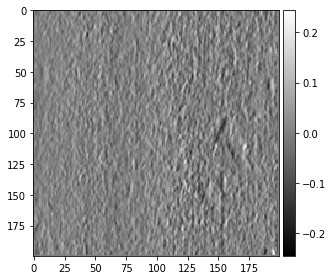

In [40]:
imshow(edges_prewitt_vertical, cmap='gray')

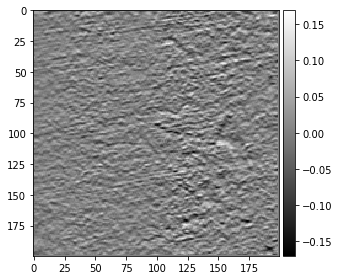

In [41]:
imshow(edges_prewitt_horizontal, cmap='gray')

In [42]:

for i in range(len(edge_features)):
    img = edge_features[i]
    edge_features[i] = prewitt_h(edge_features[i])
    

In [43]:
print(edge_features[1].shape)

(200, 200)


In [44]:
for i in range(1800):
    edge_features[i]=(edge_features[i].reshape(200*200))


In [45]:
edge_features[848][598]

0.122875816993464

In [46]:
DF['Horizontal_Edge']=edge_features

In [47]:
DF.head()

,contrast,dissimilarity,homogeneity,ASM,energy,Flatten_Pixel,Class,Horizontal_Edge
0,320.838116,14.130477,0.069042,0.000197,0.014052,"[186, 175, 173, 196, 190, 188, 172, 174, 192, ...",0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,240.708618,12.119623,0.083115,0.000182,0.013508,"[163, 160, 148, 142, 174, 191, 207, 215, 176, ...",0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,274.596633,12.992412,0.077501,0.000213,0.014600,"[127, 106, 104, 118, 115, 94, 112, 105, 100, 7...",0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,313.191231,13.981332,0.069765,0.000235,0.015342,"[173, 164, 146, 147, 178, 170, 170, 183, 171, ...",0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,152.986181,9.431005,0.107868,0.000235,0.015315,"[163, 179, 169, 157, 161, 181, 168, 130, 117, ...",0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [48]:
#Extracting Edges Features........
edge_featuresv=[]
INPUT_SCAN_FOLDER='C:\\Users\\thaqu\\Desktop\\MTech Project Machine Learning\\NEU-DET\\NEU surface defect database\\' # path where the dataset is stored

for dirName, subdirList, fileList in os.walk(INPUT_SCAN_FOLDER):
        for filename in fileList:
            if ".bmp" in filename.lower():
                edge_featuresv.append(cv2.imread(os.path.join(dirName, filename),0))

print("done")

for i in range(len(edge_featuresv)):
    img = edge_featuresv[i]
    edge_featuresv[i] = prewitt_h(edge_featuresv[i])
for i in range(1800):
    edge_featuresv[i]=(edge_featuresv[i].reshape(200*200))
DF['Vertical_Edge']=edge_featuresv

done


In [49]:
DF.head()

,contrast,dissimilarity,homogeneity,ASM,energy,Flatten_Pixel,Class,Horizontal_Edge,Vertical_Edge
0,320.838116,14.130477,0.069042,0.000197,0.014052,"[186, 175, 173, 196, 190, 188, 172, 174, 192, ...",0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,240.708618,12.119623,0.083115,0.000182,0.013508,"[163, 160, 148, 142, 174, 191, 207, 215, 176, ...",0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,274.596633,12.992412,0.077501,0.000213,0.014600,"[127, 106, 104, 118, 115, 94, 112, 105, 100, 7...",0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,313.191231,13.981332,0.069765,0.000235,0.015342,"[173, 164, 146, 147, 178, 170, 170, 183, 171, ...",0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,152.986181,9.431005,0.107868,0.000235,0.015315,"[163, 179, 169, 157, 161, 181, 168, 130, 117, ...",0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [50]:
l=DF["Class"]

In [51]:
Data=DF.drop('Class',axis=1)

In [52]:
Data['Class']=l

In [53]:
Data.head()

,contrast,dissimilarity,homogeneity,ASM,energy,Flatten_Pixel,Horizontal_Edge,Vertical_Edge,Class
0,320.838116,14.130477,0.069042,0.000197,0.014052,"[186, 175, 173, 196, 190, 188, 172, 174, 192, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0
1,240.708618,12.119623,0.083115,0.000182,0.013508,"[163, 160, 148, 142, 174, 191, 207, 215, 176, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0
2,274.596633,12.992412,0.077501,0.000213,0.014600,"[127, 106, 104, 118, 115, 94, 112, 105, 100, 7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0
3,313.191231,13.981332,0.069765,0.000235,0.015342,"[173, 164, 146, 147, 178, 170, 170, 183, 171, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0
4,152.986181,9.431005,0.107868,0.000235,0.015315,"[163, 179, 169, 157, 161, 181, 168, 130, 117, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0


In [54]:
filepath="C:\\Users\\thaqu\\Desktop\\MTech Project Machine Learning\\Neu knn\\steel_plate-master"+"Allnewfeatures.xlsx"  #path where to save the features
Data.to_excel(filepath)